
This is the official YOLOv6 notebook by MeiTuan, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/).
For more information please visit https://github.com/meituan/YOLOv6. Thank you!

# Introduction

YOLOv6 is a single-stage object detection framework dedicated to industrial applications, with hardware-friendly efficient design and high performance.

YOLOv6 is composed of the following methods:

Hardware-friendly Design for Backbone and Neck
Efficient Decoupled Head with SIoU Loss

# Setup
Clone repo and install dependencies.

In [2]:
!git clone https://github.com/meituan/YOLOv6.git
!cd YOLOv6 && pip install -r requirements.txt && pip install -e .

Cloning into 'YOLOv6'...
remote: Enumerating objects: 3838, done.
remote: Total 3838 (delta 0), reused 0 (delta 0), pack-reused 3838 (from 1)
Receiving objects: 100% (3838/3838), 43.99 MiB | 13.45 MiB/s, done.
Resolving deltas: 100% (2298/2298), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 75.1 MB/s eta 0:00:00
Obtaining file:///content/YOLOv6
  Preparing metadata (setup.py) ... done
  Running setup.py develop for yolov6


# Inference
First, download a pretrained model from the YOLOv6 [release](https://github.com/meituan/YOLOv6/releases).



In [2]:
# Download a pretrained model
import torch
torch.hub.download_url_to_file('https://github.com/meituan/YOLOv6/releases/download/0.4.0/yolov6n.pt', 'yolov6n.pt')

100%|██████████| 10.0M/10.0M [00:00<00:00, 35.3MB/s]


Second, run inference with `tools/infer.py`, and saving results to `runs/inference`. Example inference sources are:

```shell
python tools/infer.py --weights yolov6s.pt --source img.jpg / imgdir
                                yolov6n.pt
```

Namespace(weights='yolov6n.pt', source='data/images/image1.jpg', webcam=False, webcam_addr='0', yaml='data/coco.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
checkpoint yolov6n.pt not exist, try to downloaded it from github.
downloading url is: https://github.com/meituan/YOLOv6/releases/download/0.4.0/yolov6n.pt, pealse make sure the version of the downloading model is correspoing to the code version!
checkpoint yolov6n.pt downloaded and saved
Loading checkpoint from yolov6n.pt
/content/YOLOv6/yolov6/utils/checkpoint.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execu

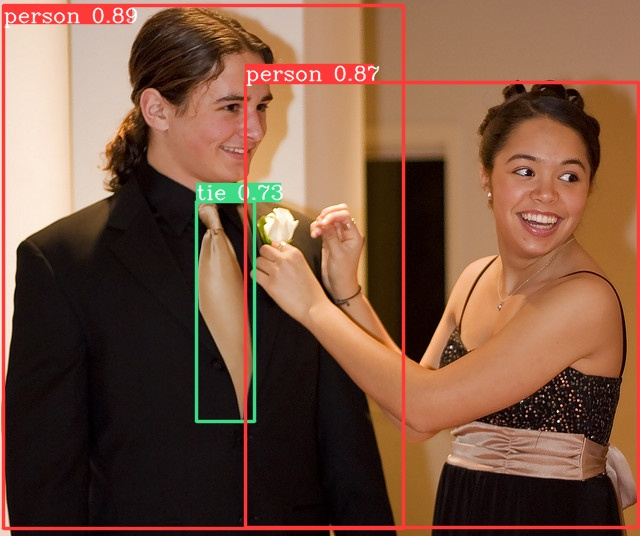

In [3]:
!cd YOLOv6 && python tools/infer.py --weights yolov6n.pt --source data/images/image1.jpg
from PIL import Image
Image.open('YOLOv6/runs/inference/exp/image1.jpg')

### You can also use torch.hub style to load the pretrained model or custom model to inference.

In [5]:
import torch

model_local = torch.hub.load('YOLOv6', 'yolov6n', source='local')

AttributeError: Can't get attribute 'SimConv' on <module 'yolov6.layers.common' from '/content/YOLOv6/yolov6/layers/common.py'>

### Or create a model instance from a checkpoint

In [7]:
from YOLOv6.hubconf import Detector, DEVICE, CLASS_NAMES, PATH_YOLOv6

model_local = Detector("yolov6n.pt", CLASS_NAMES, DEVICE)

In [8]:
img_path = 'YOLOv6/data/images/image1.jpg'

In [9]:
prediction = model_local.predict(img_path)
#prediction = model_custom.predict(img_path)
display(prediction)

{'boxes': array([[          3,           5,         403,         528],
        [        245,          82,         638,         527],
        [        196,         201,         254,         421]], dtype=float32),
 'scores': array([    0.88689,     0.87145,     0.73044], dtype=float32),
 'labels': array([ 0,  0, 27]),
 'classes': ['person', 'person', 'tie']}

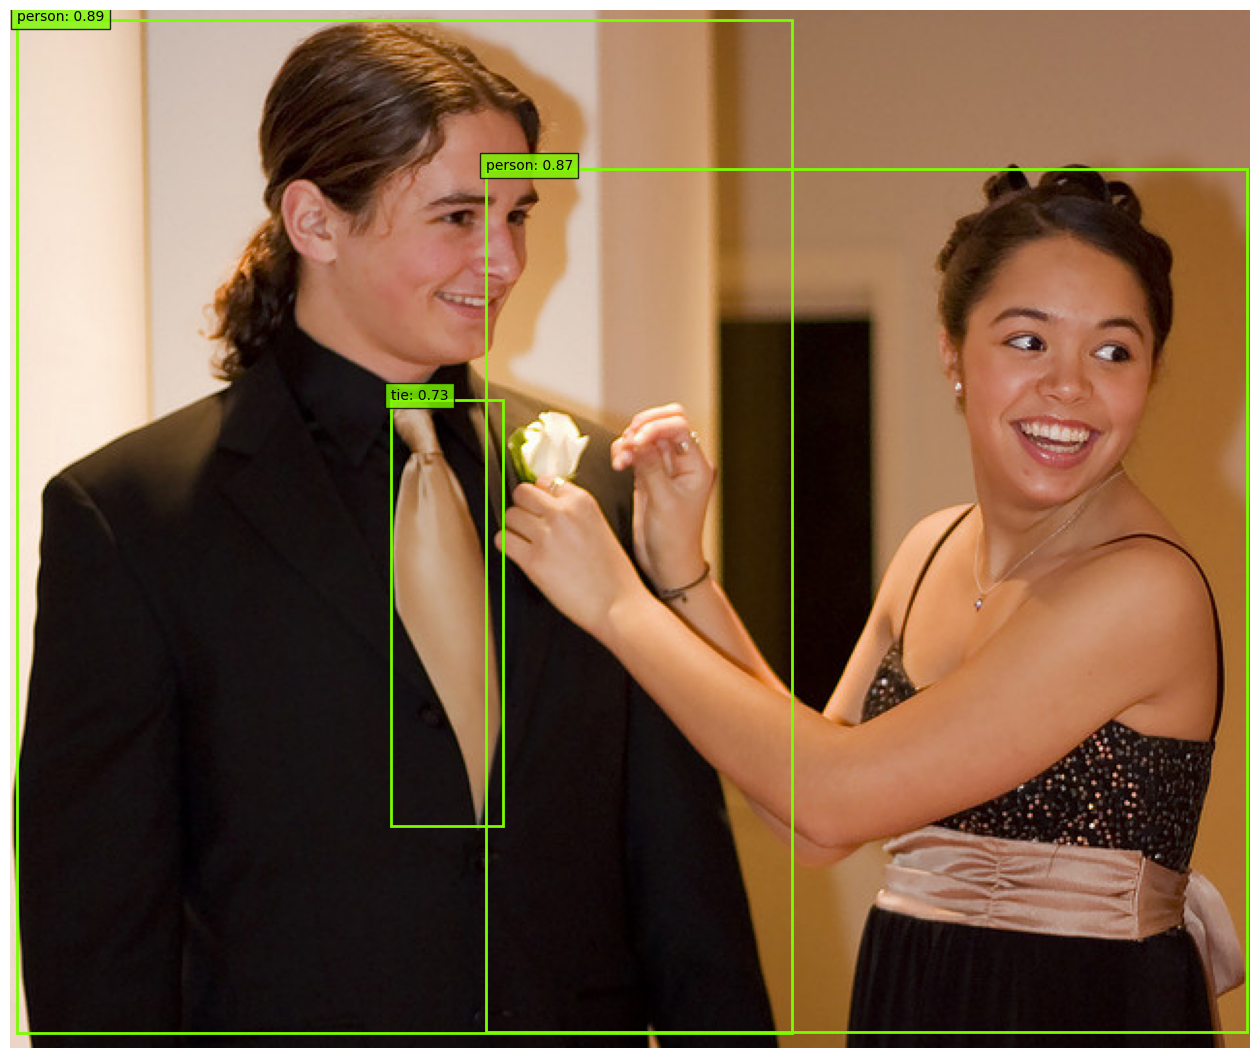

In [10]:
model_local.show_predict(img_path)

# Validate
Validate a model's accuracy on [COCO](https://cocodataset.org/#home) val or test-dev datasets. Models are downloaded automatically from the [latest YOLOv6 release](https://github.com/meituan/YOLOv6/releases).

## COCO val
Download COCO val 2017 dataset (1GB - 5000 images), and test model accuracy.

In [14]:
# Download COCO val
import torch
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d . && rm tmp.zip

100%|██████████| 780M/780M [00:03<00:00, 265MB/s]


In [15]:
# Run yolov6x on coco val
!cd YOLOv6 && python tools/eval.py --weights yolov6n.pt --data data/coco.yaml --img 640

Namespace(data='data/coco.yaml', weights='yolov6n.pt', batch_size=32, img_size=640, conf_thres=0.03, iou_thres=0.65, task='val', device='0', half=False, save_dir='runs/val/', name='exp', shrink_size=0, infer_on_rect=True, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='', specific_shape=False, height=None, width=None)
Loading checkpoint from yolov6n.pt
/content/YOLOv6/yolov6/utils/checkpoint.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the

# Train coco data
conf: select config file to specify network/optimizer/hyperparameters

data: prepare [COCO](http://cocodataset.org)  dataset, [YOLO format coco labes](https://github.com/meituan/YOLOv6/releases/download/0.1.0/coco2017labels.zip) and specify dataset paths in data.yaml

make sure your dataset structure as fellows:
```shell
├── coco
│   ├── annotations
│   │   ├── instances_train2017.json
│   │   └── instances_val2017.json
│   ├── images
│   │   ├── train2017
│   │   └── val2017
│   ├── labels
│   │   ├── train2017
│   │   ├── val2017
│   ├── LICENSE
│   ├── README.txt
```

## COCO datasets

In [23]:
# Download coco datasets and need about 30mins.
!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/zips/test2017.zip
!unzip -qn train2017.zip -d coco/images && rm train2017.zip
!unzip -qn val2017.zip -d coco/images && rm val2017.zip
!unzip -qn test2017.zip -d coco/images && rm test2017.zip

In [ ]:
# Train YOLOv6s on COCO for 30 epochs
!cd YOLOv6 && python tools/train.py --img 640 --batch 32 --epochs 30 --conf configs/yolov6s.py --data data/coco.yaml

## COCO128 datasets
You need create a new file `coco128.yaml` under the folder `./data`.The details are as follows:

```
# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../coco128  # dataset root dir
train: images/train2017  # train images (relative to 'path') 128 images
val: images/train2017  # val images (relative to 'path') 128 images
test:  # test images (optional)

# Classes
nc: 80  # number of classes
names: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
        'hair drier', 'toothbrush']  # class names
```

In [ ]:
coco128 = """# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../coco128  # dataset root dir
train: ../coco128/images/train2017  # train images 128 images
val: ../coco128/images/train2017  # val images 128 images
test:  # test images (optional)

# Classes
nc: 80  # number of classes
names: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
        'hair drier', 'toothbrush']  # class names
"""

with open('YOLOv6/data/coco128.yaml', 'w') as f:
  f.write(coco128)

In [ ]:
# Download coco128 datasets
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco128.zip', 'coco128.zip')
!unzip -q coco128.zip -d . && rm coco128.zip

# torch.hub.download_url_to_file('https://drive.google.com/file/d/1HICm-rrsdp89GNpFbzcwksHRtDx10McK/view?usp=sharing', 'tmp.zip')
# !unzip -q tmp.zip -d . && rm tmp.zip

  0%|          | 0.00/6.66M [00:00<?, ?B/s]

In [ ]:
# Train YOLOv6s on COCO128 for 100 epochs
!cd YOLOv6 && python tools/train.py --img 640 --batch 32 --epochs 100 --data data/coco128.yaml

Using 1 GPU for training... 
training args are: Namespace(batch_size=32, check_images=False, check_labels=False, conf_file='./configs/yolov6s.py', data_path='data/coco128.yaml', device='0', dist_url='env://', epochs=100, eval_final_only=False, eval_interval=20, gpu_count=0, heavy_eval_range=50, img_size=640, local_rank=-1, name='exp', output_dir='./runs/train', rank=-1, resume=False, save_dir='runs/train/exp', workers=8, world_size=1)

Train: Checking formats of images with 2 process(es): 

  0% 0/128 [00:00<?, ?it/s]
0 image(s) corrupted: 100% 128/128 [00:00<00:00, 3223.54it/s]
Train: Checking formats of labels with 2 process(es): 
128 label(s) found, 0 label(s) missing, 2 label(s) empty, 0 invalid label files: 100% 128/128 [00:00<00:00, 3653.13it/s]
Train: Final numbers of valid images: 128/ labels: 128. 
0.2s for dataset initialization.
Convert to COCO format
100% 128/128 [00:00<00:00, 32588.98it/s]
Convert to COCO format finished. Results saved in ../coco128/annotations/instances_t

In [ ]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir YOLOv6/runs/train

# Train Custom Data
This guidence explains how to train your own custom data with YOLOv6 (take fine-tuning YOLOv6-s model for example).

**Step 1** Prepare your own dataset with images. For labeling images, you can use tools like [Labelme](https://github.com/wkentaro/labelme).

**Step 2** Generate label files in YOLO format.

One image corresponds to one label file, and the label format example is presented as below.

```json
# class_id center_x center_y bbox_width bbox_height
0 0.300926 0.617063 0.601852 0.765873
1 0.575 0.319531 0.4 0.551562
```

- Each row represents one object.
- Class id starts from `0`.
- Boundingbox coordinates must be in normalized `xywh` format (from 0 - 1). If your boxes are in pixels, divide `center_x` and `bbox_width` by image width, and `center_y` and `bbox_height` by image height.

**Step 3** Organize directories.

Organize your directory of custom dataset as follows:

```shell
custom_dataset
├── images
│   ├── train
│   │   ├── train0.jpg
│   │   └── train1.jpg
│   ├── val
│   │   ├── val0.jpg
│   │   └── val1.jpg
│   └── test
│       ├── test0.jpg
│       └── test1.jpg
└── labels
    ├── train
    │   ├── train0.txt
    │   └── train1.txt
    ├── val
    │   ├── val0.txt
    │   └── val1.txt
    └── test
        ├── test0.txt
        └── test1.txt
```

**Step 4** Create `dataset.yaml` in `$YOLOv6_DIR/data`.

```yaml
# Please insure that your custom_dataset are put in same parent dir with YOLOv6_DIR
train: ../custom_dataset/images/train # train images
val: ../custom_dataset/images/val # val images
test: ../custom_dataset/images/test # test images (optional)

# whether it is coco dataset, only coco dataset should be set to True.
is_coco: False

# Classes
nc: 20  # number of classes
names: ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog',
        'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']  # class names
```

## Create a config file


We use a config file to specify the network structure and training setting, including  optimizer and data augmentation hyperparameters.

If you create a new config file, please put it under the configs directory.
Or just use the provided config file in `$YOLOV6_HOME/configs/*_finetune.py`.

```python
## YOLOv6s Model config file
model = dict(
    type='YOLOv6s',
    pretrained='./weights/yolov6s.pt', # download pretrain model from YOLOv6 github if use pretrained model
    depth_multiple = 0.33,
    width_multiple = 0.50,
    ...
)
solver=dict(
    optim='SGD',
    lr_scheduler='Cosine',
    ...
)

data_aug = dict(
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    ...
)
```



## Train

In [ ]:
!cd YOLOv6 && python tools/train.py --batch 256 --conf configs/yolov6s_finetune.py --data data/data.yaml

# Test Speed

In [ ]:
!cd YOLOv6 && python tools/eval.py --data data/coco128.yaml --batch 32 --weights yolov6s.pt --task speed

Namespace(batch_size=32, conf_thres=0.001, data='data/coco128.yaml', device='0', half=False, img_size=640, iou_thres=0.65, name='exp', save_dir='runs/val/', task='speed', weights='yolov6s.pt')
Loading checkpoint from yolov6s.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
Model Summary: Params: 17.22M, Gflops: 44.19
Speed: Checking formats of labels with 2 process(es): 
128 label(s) found, 0 label(s) missing, 2 label(s) empty, 0 invalid label files: 100% 128/128 [00:00<00:00, 2462.39it/s]
Speed: Final numbers of valid images: 128/ labels: 128. 
0.2s for dataset initialization.
Inferencing model in val datasets.: 100% 4/4 [00:01<00:00,  2.24it/s]

Evaluating speed.
Average pr